# Accidents de trànsit a Catalunya

## Setup 

### Importem els moduls que necessitarem

In [40]:
import pandas as pd

### Guardar les dades dels accidents a un df

In [41]:
AccidentsCOMPLET = pd.read_csv("dades/Accidents_de_tr_nsit_amb_morts_o_ferits_greus_a_Catalunya_20250131.csv")

## Accidents amb nom de via

Netejar dades d'Accidents per quedar-nos amb els que especifiquen via

A AccidentsPerAny apareixen els accidents classificats per anys des del 2010 fins al 2023. L'index 0 es l'any 2010 mentre que el 2023 és l'index 13 

In [42]:
AccidentsNomViaHistoric = AccidentsCOMPLET.drop(AccidentsCOMPLET[AccidentsCOMPLET['via'] == 'SE'].index)
AccidentsPerAny = []
for i in range(2010,2024):
    AccidentsPerAny.append(AccidentsNomViaHistoric.drop(AccidentsNomViaHistoric[AccidentsNomViaHistoric['Any'] != i].index))
AccidentsPerAny[0]
AccidentsPerAny[13]

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,...,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
22746,2023,Zona urbana,20/11/2023,C-246,20,Castelldefels,Baix Llobregat,Barcelona,0,1,...,Sec i net,Carretera convencional,NaN,NaN,"Calma, vent molt suau",Feiners,16.00,Tarda,Atropellament,dill-dij
22747,2023,Carretera,09/01/2023,B-140,"3,4",Santa Perpètua de Mogoda,Vallès Occidental,Barcelona,0,1,...,Sec i net,Carretera convencional,Altres,Sense especificar,"Calma, vent molt suau",Feiners,18.10,Tarda,Altres,dill-dij
22748,2023,Carretera,06/11/2023,A-2,"482,7",Sidamon,Pla d'Urgell,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",Feiners,13.41,Matí,Col.lisió de vehicles en marxa,dill-dij
22750,2023,Carretera,01/07/2023,N-260,"139,1",Planoles,Ripollès,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",CapDeSetmana,10.22,Matí,Sortida de la calcada sense especificar,dis
22751,2023,Carretera,11/02/2023,AP-7,"37,4",Bàscara,Alt Empordà,Girona,1,2,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,19.30,Tarda,Col.lisió de vehicles en marxa,dis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24471,2023,Carretera,25/04/2023,B-10,"19,1","Hospitalet de Llobregat, l'",Barcelonès,Barcelona,0,1,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,18.04,Tarda,Col.lisió de vehicles en marxa,dill-dij
24473,2023,Zona urbana,25/10/2023,C-250,"4,3",Quart,Gironès,Girona,0,1,...,Sec i net,Carretera convencional,Altres,Sense especificar,"Calma, vent molt suau",Feiners,8.05,Matí,Altres,dill-dij
24474,2023,Carretera,10/03/2023,BV-5001,"11,4",Sant Fost de Campsentelles,Vallès Oriental,Barcelona,0,1,...,Sec i net,Carretera convencional,Provincial,Pla,"Calma, vent molt suau",CapDeSetmana,21.44,Tarda,Altres,div
24475,2023,Carretera,12/11/2023,C-17,"16,5",Parets del Vallès,Vallès Oriental,Barcelona,0,1,...,Sec i net,Carretera convencional,Autonòmica,Pla,"Calma, vent molt suau",CapDeSetmana,10.37,Matí,Col.lisió de vehicles en marxa,dg


## Accidents en base a la densitat de població per comarca 

In [43]:
PobComarques = pd.read_csv("dades/densitatPerComarca2023.csv")
PobComarques


,comarca,població,superfície,densitat
0,Alt Camp,46076,538,85.6
1,Alt Empordà,146766,1358,108.1
2,Alt Penedès,112460,593,189.8
3,Alt Urgell,20762,1447,14.3
4,Alta Ribagorça,4019,427,9.4
5,Anoia,126752,866,146.3
6,Aran,10496,634,16.6
7,Bages,183265,1092,167.8
8,Baix Camp,201647,697,289.2
9,Baix Ebre,81334,1003,81.1


In [44]:
# Agrupa per comarca i compta el nombre d'accidents
accidentsPerComarca2023 = AccidentsPerAny[13]['nomCom'].value_counts().reset_index()
accidentsPerComarca2023.columns = ['comarca', 'Nombre Accidents']

# Ordena per nombre d'accidents (opcional)
accidentsPerComarca2023 = accidentsPerComarca2023.sort_values(by='Nombre Accidents', ascending=False)

# Mostra la taula
accidentsPerComarca2023

,comarca,Nombre Accidents
0,Baix Llobregat,68
1,Vallès Oriental,61
2,Vallès Occidental,57
3,Maresme,48
4,Barcelonès,38
5,Tarragonès,33
6,Bages,32
7,Selva,31
8,Alt Empordà,30
9,Alt Penedès,28


## Accidents per densitat de poblacio

In [45]:
pobComarquesFiltrat = PobComarques[['comarca','densitat']]
# Fem el merge per comarca
accidentsAmbDensitat = pd.merge(accidentsPerComarca2023, pobComarquesFiltrat, on='comarca')

# Mostra la taula combinada
accidentsAmbDensitat

,comarca,Nombre Accidents,densitat
0,Baix Llobregat,68,1729.6
1,Vallès Oriental,61,574.4
2,Vallès Occidental,57,1627.5
3,Maresme,48,1172.8
4,Barcelonès,38,15876.3
5,Tarragonès,33,846.2
6,Bages,32,167.8
7,Selva,31,183.5
8,Alt Empordà,30,108.1
9,Alt Penedès,28,189.8


## Accidents prop de radars

In [46]:
radarsCatalunya = pd.read_csv('dades/radarsCatalunya.csv')

In [47]:
df2023 = AccidentsPerAny[13]

accidentsPropDeRadar = []

# Assegura't que les columnes PK són float (o int)
df2023['pk'] = pd.to_numeric(df2023['pk'], errors='coerce')
radarsCatalunya['PK'] = pd.to_numeric(radarsCatalunya['PK'], errors='coerce')

# També assegurem que 'VIA' té el mateix format (en majúscules per si cal)
df2023['via'] = df2023['via'].str.upper()
radarsCatalunya['VIA'] = radarsCatalunya['VIA'].str.upper()

for _, radar in radarsCatalunya.iterrows():
    viaRadar = radar['VIA']
    pkRadar = radar['PK']
    
    # Accidents a la mateixa via i dins d'1 km del radar
    accidentsProxims = df2023[
        (df2023['via'] == viaRadar) &
        (abs(df2023['pk'] - pkRadar) <= 1.5)
    ]
    
    accidentsPropDeRadar.append(accidentsProxims)

# Combina resultats i elimina duplicats
accidentsPropDeRadar = pd.concat(accidentsPropDeRadar).drop_duplicates().reset_index(drop=True)
accidentsPropDeRadar

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,...,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,2023,Carretera,02/04/2023,A-2,478.0,Bell-lloc d'Urgell,Pla d'Urgell,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,Vent fort,CapDeSetmana,13.17,Matí,Col.lisió de vehicles en marxa,dg
1,2023,Carretera,06/06/2023,A-2,569.0,"Bruc, el",Anoia,Barcelona,0,1,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,7.07,Matí,Bolcada a la calcada,dill-dij
2,2023,Carretera,10/09/2023,A-2,578.0,Esparreguera,Baix Llobregat,Barcelona,1,0,...,Sec i net,Carretera convencional,Altres,Sense especificar,"Calma, vent molt suau",CapDeSetmana,16.46,Tarda,Atropellament,dg
3,2023,Carretera,02/10/2023,A-2,602.0,Sant Vicenç dels Horts,Baix Llobregat,Barcelona,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",Feiners,15.23,Tarda,Altres,dill-dij
4,2023,Carretera,20/12/2023,A-2,609.0,Cornellà de Llobregat,Baix Llobregat,Barcelona,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",Feiners,19.03,Tarda,Col.lisió de vehicles en marxa,dill-dij
5,2023,Carretera,05/04/2023,B-20,17.0,Santa Coloma de Gramenet,Barcelonès,Barcelona,0,1,...,Sec i net,Carretera convencional,Autonòmica,Pla,"Calma, vent molt suau",Feiners,8.45,Matí,Col.lisió de vehicles en marxa,dill-dij
6,2023,Carretera,14/11/2023,BV-5001,9.0,Montcada i Reixac,Vallès Occidental,Barcelona,0,1,...,Sec i net,Carretera convencional,Municipal,Pla,"Calma, vent molt suau",Feiners,11.06,Matí,Altres,dill-dij
7,2023,Carretera,16/11/2023,C-1412A,40.0,"Prats de Rei, els",Anoia,Barcelona,0,2,...,Sec i net,Carretera convencional,Provincial,Rampa o pendent,"Calma, vent molt suau",Feiners,9.42,Matí,Col.lisió d'un vehicle contra un obstacle de l...,dill-dij
8,2023,Zona urbana,10/07/2023,C-155,11.0,Lliçà de Vall,Vallès Oriental,Barcelona,0,1,...,Sec i net,Carretera convencional,Autonòmica,Rampa o pendent,"Calma, vent molt suau",Feiners,22.26,Nit,Col.lisió de vehicles en marxa,dill-dij
9,2023,Carretera,17/07/2023,C-155,14.0,Lliçà de Vall,Vallès Oriental,Barcelona,1,0,...,Sec i net,Carretera convencional,Autonòmica,Rampa o pendent,"Calma, vent molt suau",Feiners,2.14,Nit,Sortida de la calcada sense especificar,dill-dij


## accidents per radar per comarca 

In [48]:
accidentsPerRadarComarca = accidentsPropDeRadar['nomCom'].value_counts().reset_index()
accidentsPerRadarComarca.columns = ['comarca', 'accidentsPropDeRadar']

accidentsPerRadarComarca

,comarca,accidentsPropDeRadar
0,Vallès Oriental,5
1,Bages,3
2,Baix Llobregat,3
3,Vallès Occidental,2
4,Anoia,2
5,Pla d'Urgell,1
6,Barcelonès,1
7,Tarragonès,1
8,Garrigues,1
9,Alt Penedès,1


### segons el total daccidents

In [49]:
# Normalitzem noms de columna per fer el merge
accidentsPerComarca2023.rename(columns={'nomCom': 'comarca'}, inplace=True)
PobComarques.rename(columns={'nomCom': 'comarca'}, inplace=True)

# Ens quedem només amb la columna de densitat que ens interessa
pobComarquesFiltrat = PobComarques[['comarca', 'densitat']]
# Merge entre totals i accidents prop de radar
taulaFinal = pd.merge(accidentsPerComarca2023, accidentsPerRadarComarca, on='comarca', how='left')

# Els que no tenen accidents prop de radar = 0
taulaFinal['accidentsPropDeRadar'] = taulaFinal['accidentsPropDeRadar'].fillna(0)

# Afegim densitat
taulaFinal = pd.merge(taulaFinal, pobComarquesFiltrat, on='comarca', how='left')
taulaFinal['percentatgePropRadar'] = (taulaFinal['accidentsPropDeRadar'] / taulaFinal['Nombre Accidents']) * 100
taulaFinal['percentatgePropRadar'] = taulaFinal['percentatgePropRadar'].round(2)
taulaFinal = taulaFinal.sort_values(by='percentatgePropRadar', ascending=False)
taulaFinalFiltrada = taulaFinal[taulaFinal['accidentsPropDeRadar'] > 0].reset_index(drop=True)
taulaFinalFiltrada


,comarca,Nombre Accidents,accidentsPropDeRadar,densitat,percentatgePropRadar
0,Pla d'Urgell,9,1.0,123.7,11.11
1,Garrigues,10,1.0,23.7,10.00
2,Bages,32,3.0,167.8,9.38
3,Anoia,23,2.0,146.3,8.70
4,Vallès Oriental,61,5.0,574.4,8.20
5,Baix Llobregat,68,3.0,1729.6,4.41
6,Alt Penedès,28,1.0,189.8,3.57
7,Vallès Occidental,57,2.0,1627.5,3.51
8,Tarragonès,33,1.0,846.2,3.03
9,Barcelonès,38,1.0,15876.3,2.63


## Accidents per tipus

In [50]:
df2023 = AccidentsPerAny[13]

# Agrupem per subtipus d'accident
accidentsPerSubtipus = df2023['D_SUBTIPUS_ACCIDENT'].value_counts().reset_index()
accidentsPerSubtipus.columns = ['subtipusAccident', 'nombreAccidents']

# Ordenem de més a menys freqüent
accidentsPerSubtipus = accidentsPerSubtipus.sort_values(by='nombreAccidents', ascending=False)
accidentsPerSubtipus

,subtipusAccident,nombreAccidents
0,Resta sortides de via,169
1,Encalç,121
2,Col·lisió frontal,115
3,Envestida (frontal lateral),115
4,Altres,77
5,Fregament o col·lisió lateral,74
6,Caiguda en la via,49
7,Atropellament,41
8,Xoc contra objecte/obstacle sense sortida prèv...,24
9,Xoc amb animal a la calçada,3


## Segons el tipus de via i el tipus d'accident

In [51]:
df2023 = AccidentsPerAny[13]

# Taula creuada: subtipus d'accident vs tipus de via
accidentsPerTipusVia = pd.crosstab(df2023['D_SUBTIPUS_ACCIDENT'], df2023['D_TIPUS_VIA'])

# Reseteja l'índex per convertir-ho en DataFrame
accidentsPerTipusVia = accidentsPerTipusVia.reset_index()
accidentsPerTipusVia

D_TIPUS_VIA,D_SUBTIPUS_ACCIDENT,Altres,Autopista,Autovia,Camí rural/pista forestal,Carretera convencional
0,Altres,1,0,0,0,76
1,Atropellament,0,1,0,0,40
2,Caiguda en la via,0,0,0,0,49
3,Col·lisió frontal,3,0,0,0,112
4,Encalç,1,1,1,0,118
5,Envestida (frontal lateral),5,0,0,0,110
6,Fregament o col·lisió lateral,0,0,0,1,73
7,Resta sortides de via,3,0,0,0,166
8,Sortida de via amb xoc o col·lisió,0,0,0,0,1
9,Xoc amb animal a la calçada,0,0,0,0,3


Ensenyem el grafic

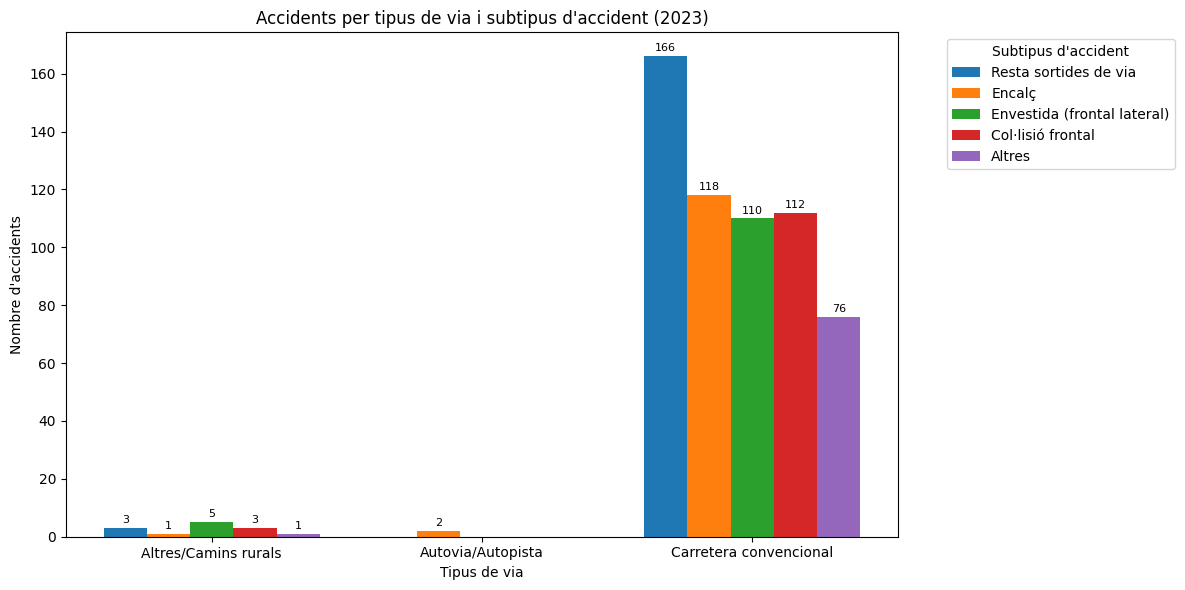

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Còpia de seguretat
df2023 = AccidentsPerAny[13].copy()

# Agrupació de valors
df2023['D_TIPUS_VIA'] = df2023['D_TIPUS_VIA'].replace({
    'Autovia': 'Autovia/Autopista',
    'Autopista': 'Autovia/Autopista',
    'Altres': 'Altres/Camins rurals',
    'Camí rural/pista forestal': 'Altres/Camins rurals'
})

# Taula creuada: files = tipus de via, columnes = subtipus
taula = pd.crosstab(df2023['D_TIPUS_VIA'], df2023['D_SUBTIPUS_ACCIDENT'])

# Limitem als 5 subtipus més freqüents (opcional per llegibilitat)
subtipusMesFrequents = taula.sum().sort_values(ascending=False).head(5).index
taula = taula[subtipusMesFrequents]

# Dades bàsiques
tipusVia = taula.index.tolist()
subtipus = taula.columns.tolist()
n_tipusVia = len(tipusVia)
n_subtipus = len(subtipus)

x = np.arange(n_tipusVia)  # una posició per cada tipus de via
ampladaBarra = 0.8 / n_subtipus

fig, ax = plt.subplots(figsize=(12, 6))

# Pintem cada subtipus com una sèrie de barres
for i, subt in enumerate(subtipus):
    offset = (i - n_subtipus / 2) * ampladaBarra + ampladaBarra / 2
    posicions = x + offset
    valors = taula[subt].values
    
    bars = ax.bar(posicions, valors, width=ampladaBarra, label=subt)
    
    # Afegeix etiqueta a sobre
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                    str(int(height)), ha='center', va='bottom', fontsize=8)

# Personalització
ax.set_title("Accidents per tipus de via i subtipus d'accident (2023)")
ax.set_xlabel("Tipus de via")
ax.set_ylabel("Nombre d'accidents")
ax.set_xticks(x)
ax.set_xticklabels(tipusVia, rotation=0)
ax.legend(title="Subtipus d'accident", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Sospitem que les dades no estan bé, doncs és estrany que sols hi hagi dos accidents a autopistes/autovies al 2023, aixi que decidim classificar per nom de via

In [53]:
# Filtrar només els accidents en carreteres convencionals
carreteresConv = df2023[df2023['D_TIPUS_VIA'] == 'Carretera convencional']

# Comptar quantes vegades surt cada via
accidentsPerVia = carreteresConv['via'].value_counts().reset_index()
accidentsPerVia.columns = ['via', 'nombreAccidents']
accidentsPerVia

,via,nombreAccidents
0,AP-7,45
1,C-31,39
2,C-32,31
3,N-340,29
4,A-2,26
...,...,...
250,C-563,1
251,T-322,1
252,C-1414,1
253,TP-2039,1


Això es estrany, doncs l'AP7 és una autopista i surt classificada a carretera convencional. Aixo indica que les dades de la taula no estan bé

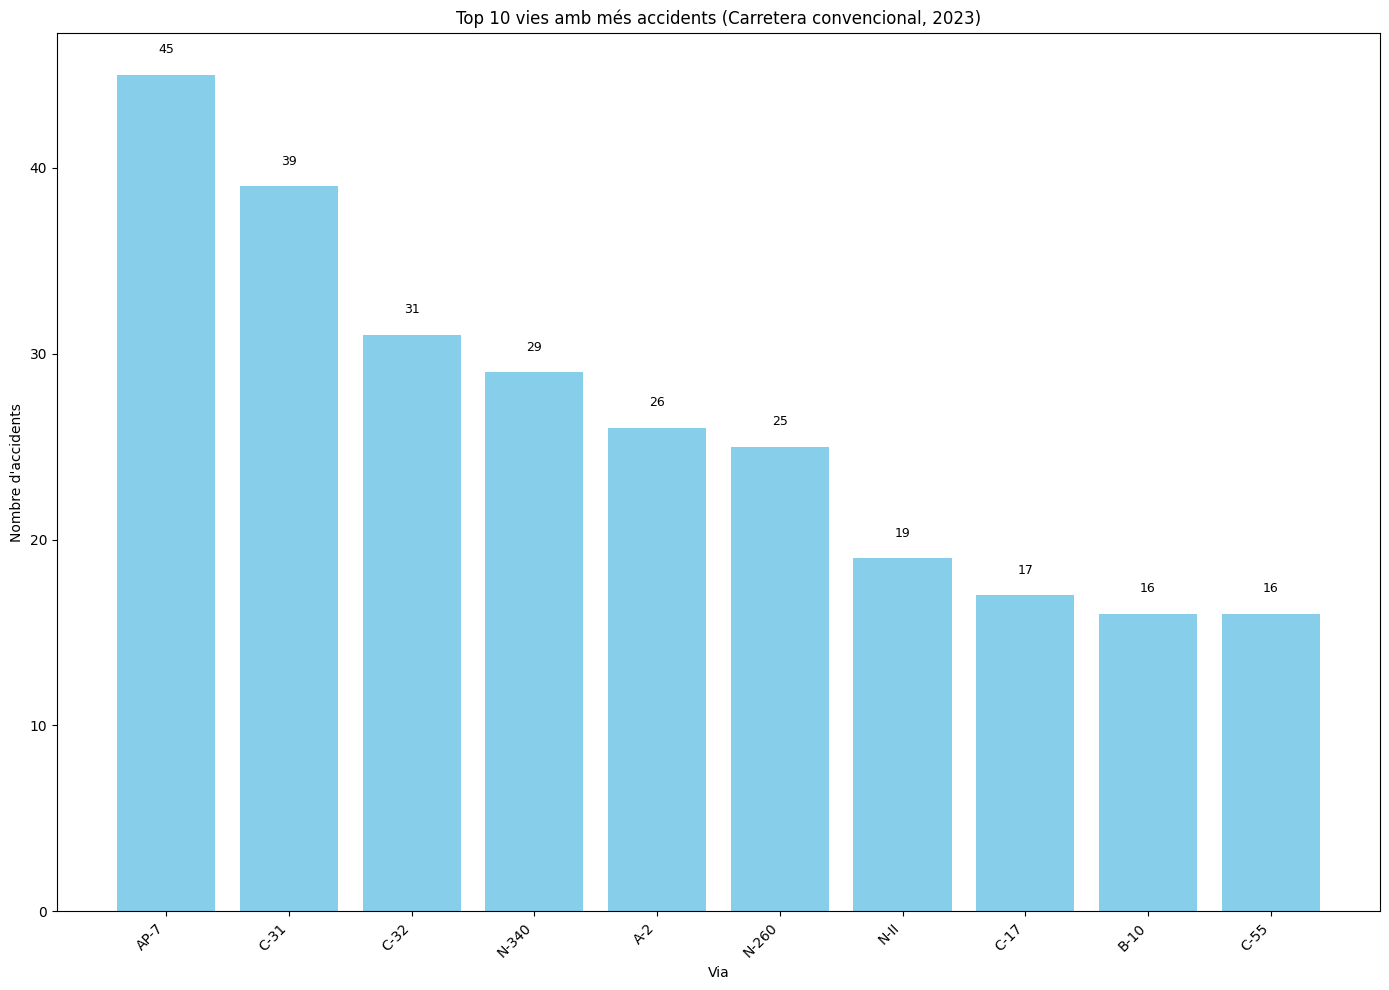

In [54]:
# Filtra les carreteres convencionals
df2023 = AccidentsPerAny[13]
carreteresConv = df2023[df2023['D_TIPUS_VIA'] == 'Carretera convencional']

# Comptar accidents per via
accidentsPerVia = carreteresConv['via'].value_counts().reset_index()
accidentsPerVia.columns = ['via', 'nombreAccidents']

# Agafem les 10 primeres
top10 = accidentsPerVia.head(10)

# Gràfic de barres
plt.figure(figsize=(14, 10))
bars = plt.bar(top10['via'], top10['nombreAccidents'], color='skyblue')

# Etiquetes a sobre de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=9)

# Estètica del gràfic
plt.title("Top 10 vies amb més accidents (Carretera convencional, 2023)")
plt.xlabel("Via")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Efectivament l'AP-7 és la via amb mes accidents (com sospitavem)

In [55]:

# Copiem el DataFrame original del 2023
df2023 = AccidentsPerAny[13].copy()

# Funció per classificar segons el nom de la via
def classificar_via(via):
    if isinstance(via, str):
        via = via.strip().upper()
        if via.startswith("AP") or via.startswith("A"):
            return "Autopista/Autovia"
        elif via.startswith("N"):
            return "Nacional"
        else:
            return "Altres"
    return "Desconegut"

# Aplicar la classificació
df2023['categoriaVia'] = df2023['via'].apply(classificar_via)

# Comptar els accidents per categoria
accidentsPerCategoria = df2023['categoriaVia'].value_counts().reset_index()
accidentsPerCategoria.columns = ['categoriaVia', 'nombreAccidents']
accidentsPerCategoria



,categoriaVia,nombreAccidents
0,Altres,597
1,Nacional,111
2,Autopista/Autovia,81


^mirar les que hi ha a altres i ampliar les classificacions 

Accidents totals per franja horaria 

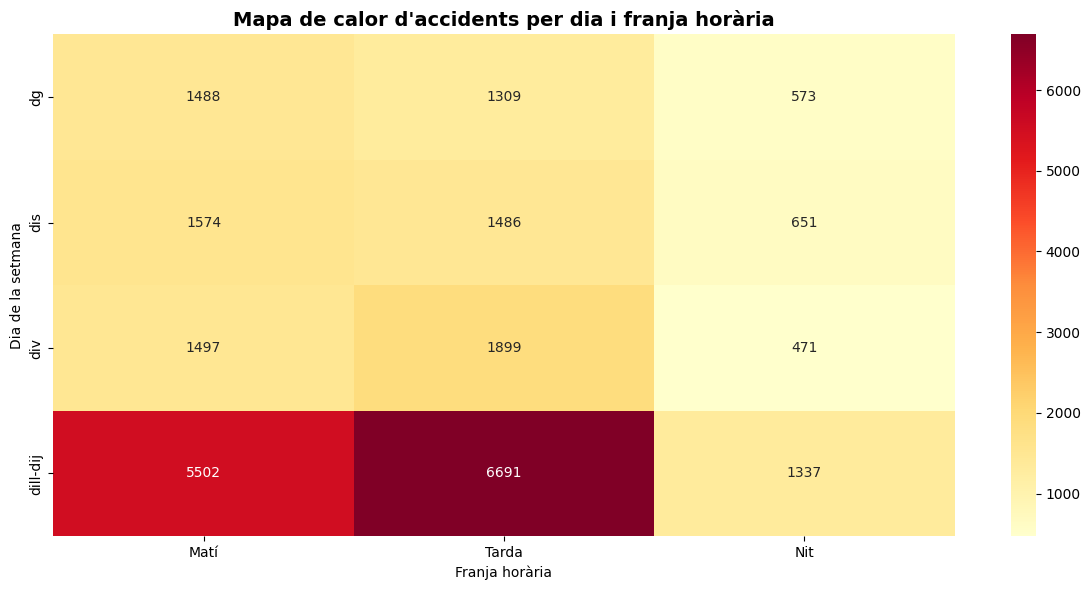

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir l'ordre desitjat de franges horàries
ordre_franges = ['Matí', 'Tarda', 'Nit']
ordre_dies = ['dg','dis','div','dill-dij']

# Crear taula de freqüències
taula_calor = pd.crosstab(AccidentsCOMPLET['tipDia'], AccidentsCOMPLET['grupHor'])

# Reordenar les columnes segons l'ordre desitjat
taula_calor = taula_calor[ordre_franges]
taula_calor = taula_calor.loc[ordre_dies]

# Dibuixar el mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(taula_calor, cmap='YlOrRd', annot=True, fmt='d')

# Etiquetes i títol
plt.title("Mapa de calor d'accidents per dia i franja horària", fontsize=14, fontweight='bold')
plt.xlabel("Franja horària")
plt.ylabel("Dia de la setmana")

plt.tight_layout()
plt.show()
